In [117]:
import mat4py as m4p
import numpy as np
from biosppy.signals import ecg
import neurokit as nk
import matplotlib.pyplot as plt

In [2]:
data=m4p.loadmat('DREAMER.mat')['DREAMER']['Data']

dict_keys(['Age', 'Gender', 'EEG', 'ECG', 'ScoreValence', 'ScoreArousal', 'ScoreDominance']

In [6]:
def score_dict(data):
    scores={}
    for i in range(len(data)):
        scores[i]=np.stack((np.array(data[i]['ScoreValence']).flatten(),np.array(data[i]['ScoreArousal']).flatten(),np.array(data[i]['ScoreDominance']).flatten()))
    return scores

In [8]:
scores=score_dict(data)

In [32]:
def baseline_csv(data):
    ecg_base={}
    for i in range(len(data)):
        ecg_base[i]=np.array(data[i]['ECG']['baseline']).reshape((18,-1,2))
    return ecg_base

In [34]:
baseline=baseline_csv(data)

In [50]:
def stimuli_csv(data):
    ecg_stimuli={}
    for i in range(len(data)):
        individual_stimuli={}
        for j in range(18):
            individual_stimuli[j]=np.array(data[i]['ECG']['stimuli'][j]).reshape((-1,2))
        ecg_stimuli[i]=individual_stimuli
    return ecg_stimuli

In [51]:
stimuli=stimuli_csv(data)

In [75]:
bio=nk.bio_process(ecg=stimuli[0][0][:,0],sampling_rate=256)

/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` i

    using multitaper spectrum estimation with 7 DPSS windows


/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` i

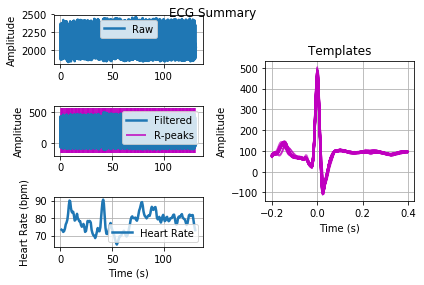

In [128]:
bios=ecg.ecg(signal=stimuli[0][1][:,0],sampling_rate=256)

['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']
(33536,)
(33536,)
[   87   296   506   718   935  1141  1341  1538  1736  1924  2098  2266
  2436  2613  2804  2987  3168  3355  3552  3755  3939  4126  4314  4516
  4709  4904  5105  5315  5518  5715  5916  6133  6355  6552  6747  6943
  7144  7335  7532  7740  7966  8179  8397  8625  8851  9055  9263  9471
  9690  9899 10090 10266 10440 10606 10775 10964 11178 11397 11612 11828
 12041 12238 12436 12638 12853 13065 13284 13506 13741 13980 14216 14438
 14660 14878 15099 15317 15525 15737 15950 16168 16394 16613 16826 17034
 17234 17428 17616 17806 17997 18192 18382 18573 18766 18965 19160 19344
 19526 19706 19883 20055 20225 20400 20584 20775 20962 21153 21346 21539
 21725 21913 22104 22292 22470 22646 22825 23008 23190 23367 23543 23724
 23915 24119 24306 24495 24690 24892 25090 25276 25462 25653 25855 26051
 26239 26428 26622 26822 27017 27208 27399 27593 27784 27969 28156 28346
 28546 28754 2895

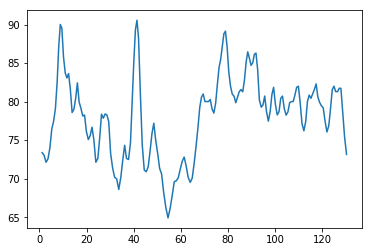

In [431]:
print(bios.keys())
plt.plot(bios['heart_rate_ts'],bios['heart_rate'])
print(stimuli[0][1][:,0].shape)
print(bios['filtered'].shape)
print(bios['rpeaks'])

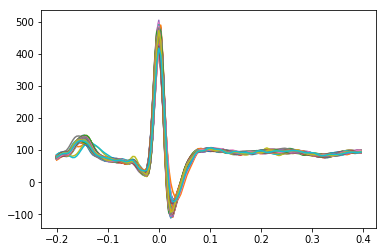

In [136]:
plt.plot(bios['templates_ts'],bios['templates'].T)

In [91]:
bio.keys()

dict_keys(['ECG', 'df'])

In [95]:
bio['ECG'].keys()

dict_keys(['R_Peaks', 'Cardiac_Cycles', 'T_Waves', 'P_Waves', 'Q_Waves', 'S_Waves', 'Q_Waves_Onsets', 'T_Waves_Onsets', 'T_Waves_Ends', 'Probable_Lead', 'Cardiac_Cycles_Signal_Quality', 'Average_Signal_Quality', 'ECG_Signal_Quality', 'HRV'])

In [96]:
bio['df'].keys()

Index(['ECG_Raw', 'ECG_Filtered', 'ECG_R_Peaks', 'Heart_Rate', 'ECG_Systole',
       'ECG_Signal_Quality', 'ECG_RR_Interval', 'ECG_HRV_ULF', 'ECG_HRV_VLF',
       'ECG_HRV_LF', 'ECG_HRV_HF', 'ECG_HRV_VHF'],
      dtype='object')

In [97]:
bio['ECG']['Probable_Lead']

'avl'

In [98]:
import cardio

In [99]:
import pandas as pd
sample=pd.read_csv('SampleECG.csv')

In [108]:
bio['ECG'].keys()

dict_keys(['R_Peaks', 'Cardiac_Cycles', 'T_Waves', 'P_Waves', 'Q_Waves', 'S_Waves', 'Q_Waves_Onsets', 'T_Waves_Onsets', 'T_Waves_Ends', 'Probable_Lead', 'Cardiac_Cycles_Signal_Quality', 'Average_Signal_Quality', 'ECG_Signal_Quality', 'HRV'])

In [111]:
from scipy import signal

In [428]:
s,t,ecg_gram=signal.spectrogram(bios['filtered'][:1000],fs=256,nperseg=32,noverlap=16)

(17, 61)


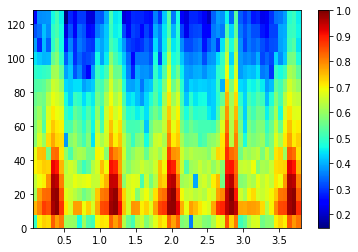

In [430]:
a=ecg_gram>0
a=np.log(ecg_gram)
a_norm=(a-a.min())/(a.max()-a.min())
print(a.shape)
p_test=plt.pcolormesh(t,s,a_norm,cmap='jet')
plt.colorbar(p_test)

In [160]:
tuk=signal.get_window(('tukey',0.25),64)

In [161]:
tuk.shape

(64,)

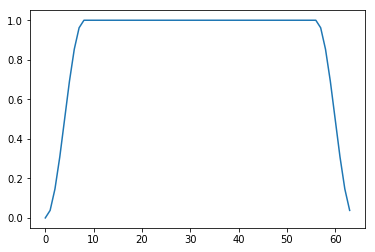

In [162]:
plt.plot(tuk)

In [223]:
import scipy
from sklearn.preprocessing import normalize
a01=scipy.io.loadmat('A00001.mat')

In [225]:
a01=(a01['val'][0])

In [226]:
a01=a01/np.linalg.norm(a01)

In [227]:
a01

array([-0.00790542, -0.01008408, -0.01226274, ..., -0.00112045,
       -0.00136944, -0.0013072 ])

In [396]:
a01_s,a01_t,a01_gram=signal.spectrogram(a01[:1000],fs=300,nperseg=32,noverlap=16)

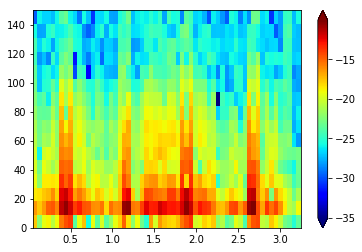

In [407]:
a01_log=np.log(a01_gram)
pcm=plt.pcolormesh(a01_t,a01_s,a01_log,cmap='jet')
plt.colorbar(pcm,  extend='both')

In [399]:
print(a01_s.shape)
print(a01_t.shape)
print(a01_log.shape)

(17,)
(61,)
(17, 61)


In [272]:
a_log_norm=normalize(a01_log)

In [322]:
test_norm=np.array([[1,2,3],[3,4,5]])

In [323]:
normalize(test_norm)

array([[0.26726124, 0.53452248, 0.80178373],
       [0.42426407, 0.56568542, 0.70710678]])

In [331]:
import pywt

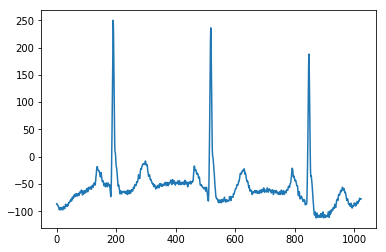

In [334]:
plt.plot(pywt.data.ecg())

570
5


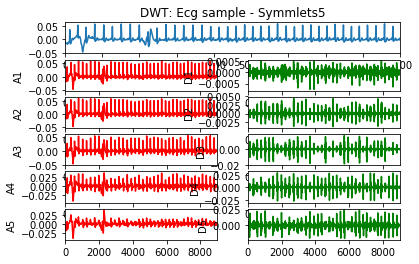

In [370]:
def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)#选取小波函数
    a = data
    ca = []#近似分量
    cd = []#细节分量
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)#进行5阶离散小波变换
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))#重构

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        if i ==3:
            print(len(coeff))
            print(len(coeff_list))
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure()
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))
    return ca,cd

#plot_signal_decomp(data1, 'coif5', "DWT: Signal irregularity")
#plot_signal_decomp(data2, 'sym5',
#                   "DWT: Frequency and phase change - Symmlets5")
mode=pywt.Modes.smooth
ca,cd=plot_signal_decomp(a01, 'db5', "DWT: Ecg sample - Symmlets5")


plt.show()

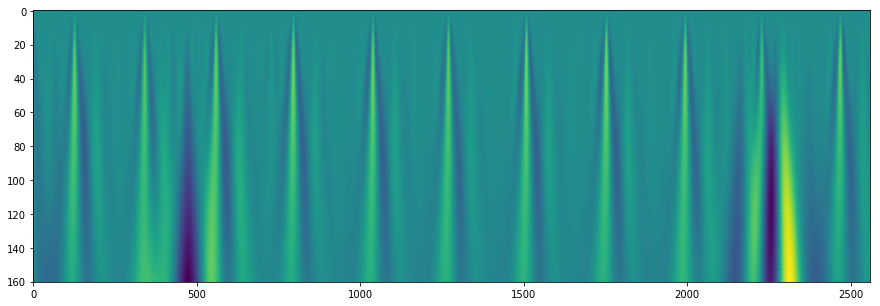

(160, 2560)
(160,)


In [460]:
widths = np.arange(1, 33,0.2)
cwtmatr, freqs = pywt.cwt(a01[0:2560], widths, "mexh")
ax1=plt.subplots(nrows=1,figsize=(15,5))
ax1=plt.imshow(cwtmatr, aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
ax2=plt.pcolormesh(cwtmatr)
plt.show() 
print(cwtmatr.shape)
print(freqs.shape)

In [401]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [432]:
import cardio

In [457]:
np.arange(1,32,0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5])